# Prediksi Penerimaan Beasiswa - Naive Byes

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
df = pd.read_csv('beasiswa.csv')

In [85]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,L,Dekat,SMAN 1 GEDONG TATAAN,2020,21,Ikut,Ikut,"3,57",Sangat Baik,Wiraswasta,Sedang,4,NaN
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,L,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,"2,95",Baik,Buruh,Sedang,2,NaN
2,3,ADELIA PANE,D III Keperawatan | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,"3,67",Sangat Baik,Petani,Sedang,4,NaN
3,4,DWI HANDOKO,D III Keperawatan | Reguler,L,Dekat,SMA MA'ARIF NU BUMIRESTU,2020,21,Tidak,Ikut,"3,19",Baik,Wiraswasta,Tinggi,2,NaN
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,P,Jauh,SMA 2 NEGERI AGUNG,2020,21,Tidak,Ikut,"3,19",Baik,Wiraswasta,Sedang,2,NaN


### Data Cleaning

In [86]:
df.isna().sum()

No                                      0
Nama Lengkap                            0
Prodi                                   0
Jenis Kelamin                           0
Jarak Tempat Tinggal kekampus (Km)      0
Asal Sekolah                            0
Tahun Lulus                             0
SKS                                     0
Ikut Organisasi                         0
Ikut UKM                                0
IPK                                     0
IPK2                                    0
Pekerjaan Orang Tua                     0
Penghasilan                             0
Tanggungan                              0
Status Beasiswa                       596
dtype: int64

In [87]:
df.shape

(596, 16)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  596 non-null    int64  
 1   Nama Lengkap                        596 non-null    object 
 2   Prodi                               596 non-null    object 
 3   Jenis Kelamin                       596 non-null    object 
 4   Jarak Tempat Tinggal kekampus (Km)  596 non-null    object 
 5   Asal Sekolah                        596 non-null    object 
 6   Tahun Lulus                         596 non-null    int64  
 7   SKS                                 596 non-null    int64  
 8   Ikut Organisasi                     596 non-null    object 
 9   Ikut UKM                            596 non-null    object 
 10  IPK                                 596 non-null    object 
 11  IPK2                                596 non-n

In [89]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
591    False
592    False
593    False
594    False
595    False
Length: 596, dtype: bool

### Pre processing & EDA

In [90]:
df['IPK'] = df['IPK'].str.replace(',', '.').astype(float)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  596 non-null    int64  
 1   Nama Lengkap                        596 non-null    object 
 2   Prodi                               596 non-null    object 
 3   Jenis Kelamin                       596 non-null    object 
 4   Jarak Tempat Tinggal kekampus (Km)  596 non-null    object 
 5   Asal Sekolah                        596 non-null    object 
 6   Tahun Lulus                         596 non-null    int64  
 7   SKS                                 596 non-null    int64  
 8   Ikut Organisasi                     596 non-null    object 
 9   Ikut UKM                            596 non-null    object 
 10  IPK                                 596 non-null    float64
 11  IPK2                                596 non-n

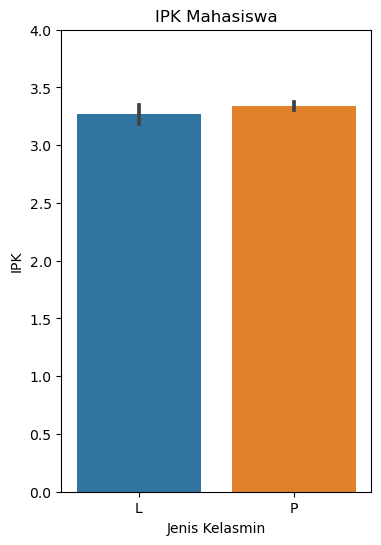

In [92]:
plt.figure(figsize=(4, 6))

# Barplot IPK
sns.barplot(x='Jenis Kelamin', y='IPK', data=df)
plt.title('IPK Mahasiswa')
plt.xlabel('Jenis Kelasmin')
plt.ylabel('IPK')
plt.ylim(0, 4) 
plt.show()

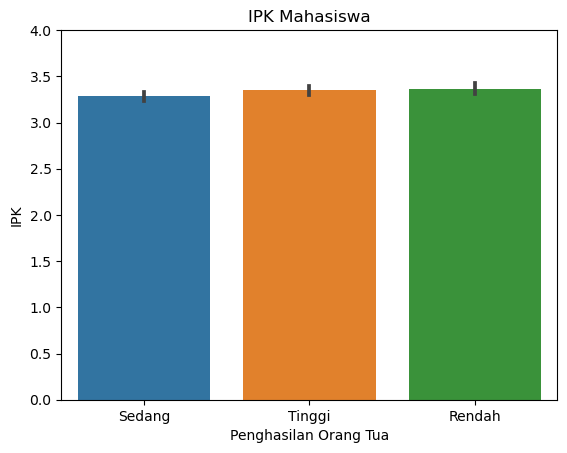

In [93]:
# Barplot IPK
sns.barplot(x='Penghasilan', y='IPK', data=df)
plt.title('IPK Mahasiswa')
plt.xlabel('Penghasilan Orang Tua')
plt.ylabel('IPK')
plt.ylim(0, 4) 
plt.show()

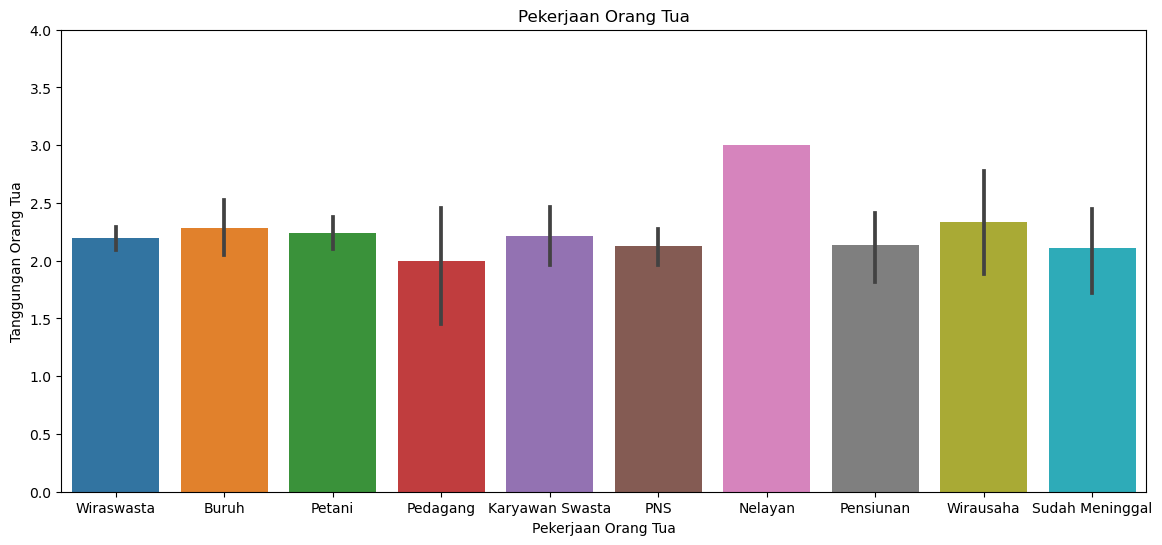

In [94]:
plt.figure(figsize=(14, 6))
# Barplot Prodi
sns.barplot(x='Pekerjaan Orang Tua', y='Tanggungan', data=df)
plt.title('Pekerjaan Orang Tua')
plt.xlabel('Pekerjaan Orang Tua')
plt.ylabel('Tanggungan Orang Tua')
plt.ylim(0, 4) 
plt.show()

### One Hot Encoding

#### Data Nominal

In [95]:
jenisKelamin = {'P':0, 'L':1}
df['Jenis Kelamin'] = df['Jenis Kelamin'].map(jenisKelamin)

In [96]:
organisasi = {'Tidak':0, 'Ikut':1}
df['Ikut Organisasi'] = df['Ikut Organisasi'].map(organisasi)

In [97]:
ukm = {'Tidak':0, 'Ikut':1}
df['Ikut UKM'] = df['Ikut UKM'].map(ukm)

In [98]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,1,Dekat,SMAN 1 GEDONG TATAAN,2020,21,1,1,3.57,Sangat Baik,Wiraswasta,Sedang,4,NaN
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,1,Dekat,SMK HAMPAR BAIDURI,2020,21,0,1,2.95,Baik,Buruh,Sedang,2,NaN
2,3,ADELIA PANE,D III Keperawatan | Reguler,0,Dekat,SMK HAMPAR BAIDURI,2020,21,0,1,3.67,Sangat Baik,Petani,Sedang,4,NaN
3,4,DWI HANDOKO,D III Keperawatan | Reguler,1,Dekat,SMA MA'ARIF NU BUMIRESTU,2020,21,0,1,3.19,Baik,Wiraswasta,Tinggi,2,NaN
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,0,Jauh,SMA 2 NEGERI AGUNG,2020,21,0,1,3.19,Baik,Wiraswasta,Sedang,2,NaN


In [99]:
df['Penghasilan'].unique()

array(['Sedang', 'Tinggi', 'Rendah'], dtype=object)

In [100]:
gaji = {'Rendah':0, 'Sedang':1, 'Tinggi':2}
df['Penghasilan'] = df['Penghasilan'].map(gaji)

In [101]:
df['Jarak Tempat Tinggal kekampus (Km)'].unique()

array(['Dekat', 'Jauh'], dtype=object)

In [102]:
jarak = {'Dekat':0, 'Jauh':1}
df['Jarak Tempat Tinggal kekampus (Km)'] = df['Jarak Tempat Tinggal kekampus (Km)'].map(jarak)

In [103]:
df.head()

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,IPK2,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,D III Keperawatan | Reguler,1,0,SMAN 1 GEDONG TATAAN,2020,21,1,1,3.57,Sangat Baik,Wiraswasta,1,4,NaN
1,2,FINGKY RANDIANSYAH,D III Keperawatan | Reguler,1,0,SMK HAMPAR BAIDURI,2020,21,0,1,2.95,Baik,Buruh,1,2,NaN
2,3,ADELIA PANE,D III Keperawatan | Reguler,0,0,SMK HAMPAR BAIDURI,2020,21,0,1,3.67,Sangat Baik,Petani,1,4,NaN
3,4,DWI HANDOKO,D III Keperawatan | Reguler,1,0,SMA MA'ARIF NU BUMIRESTU,2020,21,0,1,3.19,Baik,Wiraswasta,2,2,NaN
4,5,DESTRI FERAWANTI GUSTINI,D III Keperawatan | Reguler,0,1,SMA 2 NEGERI AGUNG,2020,21,0,1,3.19,Baik,Wiraswasta,1,2,NaN


In [108]:
df['IPK2'].unique()

array(['Sangat Baik', 'Baik', 'Cukup'], dtype=object)

In [108]:
ipk2 = {'Sangat Baik':3, 'Baik':2, 'Cukup':1}
df['IPK2'] = df['IPK2'].map(jarak)

array(['Sangat Baik', 'Baik', 'Cukup'], dtype=object)

#### Data Ordinal

In [104]:
df['Prodi'].unique()

array(['D III Keperawatan | Reguler',
       'Pendidikan Guru Sekolah Dasar | Reguler',
       'Pendidikan Matematika | Reguler',
       'Pendidikan Bahasa dan Sastra Indonesia | Reguler',
       'Manajemen | Reguler', 'Bimbingan dan Konseling | Reguler',
       'Pendidikan Bahasa Inggris | Reguler', 'S1 Keperawatan | Reguler',
       'DIII Kebidanan | Reguler', 'S1 Hukum Ekomoni Syariah | Reguler'],
      dtype=object)

In [105]:
df['Asal Sekolah'].unique()

array(['SMAN 1 GEDONG TATAAN', 'SMK HAMPAR BAIDURI',
       "SMA MA'ARIF NU BUMIRESTU", 'SMA 2 NEGERI AGUNG',
       "MA MATHLA'UL ANWAR", "MA MA'ARIF 4 KALIREJO", 'SMAN 1 KOTAAGUNG',
       'SMK HAMPAR BAIDURI KALIANDA', 'MA ANWANUL FALAH',
       'SMKN 1 NGAMBUR', 'MA ROUDLOTUL HUDA PURWOSARI PADANG RATU',
       'SMK YPIB KOTABUMI LAMPUNG UTARA', 'SMKN SUKOHARJO',
       'SMA N 1 SEMAKA', 'SMK YP SERDANG',
       'SMAN 1 BUAY PEMACA OKU SELATAN', 'SMA N 1 SENDANG AGUNG',
       'SMA N 1 BANGUN REJO', 'SMA N 1 TALANG PADANG',
       'SMAN 1 PULAU PANGGUNG', 'MAN 2 BANDAR LAMPUNG',
       'SMA MUHAMMADIYAH GISTING', 'SMK YASMIDA AMBARAWA',
       'MA MATHLAUL ANWAR GISTING', 'SMA MUHAMMADIYAH 01 MESUJI TIMUR',
       'MA PONPES AL-MUHSIN METRO', 'SMA N 1KOTAAGUNG',
       'SMA NEGERI 01 GUNUNG ALIP', 'SMAN 1 KIKIM TIMUR',
       'MAN 2 BANDARLAMPUNG', 'SMAN 2 PUNDUH PIDADA',
       'SMK MUHAMMADIYAH 3 METRO', 'SMAN 4 BANDAR LAMPUNG',
       'SMA NEGERI 1 KALIREJO', 'SMAN 1 KALIREJO', 

In [107]:
df['Pekerjaan Orang Tua'].unique()

array(['Wiraswasta', 'Buruh', 'Petani', 'Pedagang', 'Karyawan Swasta',
       'PNS', 'Nelayan', 'Pensiunan', 'Wirausaha', 'Sudah Meninggal'],
      dtype=object)